# Predicting Recidivism with Machine Learning

## Importing Data

### Import Statements

In [1]:
import numpy as np
import pandas as pd

### Loading Data

In [2]:
"Import data"
# Whole data set for data-exploration
whole_dataframe = pd.read_csv("data/broward_data.csv")
# Test train split used in XYZ paper for training our models. 
train_dataframe = pd.read_csv("data/broward_train.csv")
test_dataframe = pd.read_csv("data/broward_test.csv")

# whole_dataframe.columns

In [3]:
"""
Removing person_id, screening_date because they are not helpful to our analyses
Removing current_violence20 because redundant with 2 other columns. 
"""
whole_dataframe = whole_dataframe.drop(['person_id', "screening_date", "current_violence20"], axis=1)
test_dataframe = test_dataframe.drop(['person_id', "screening_date", "current_violence20"], axis=1)
train_dataframe = train_dataframe.drop(['person_id', "screening_date", "current_violence20"], axis=1)


In [29]:
whole_dataframe['race'].value_counts()

African-American    1124
Caucasian            601
Hispanic             127
Other                 93
Asian                  5
Native American        4
Name: race, dtype: int64

In [30]:
race_mapping = {"African-American" : 0, "Caucasian" : 1, "Hispanic" : 2, "Other" : 3, "Asian" : 4, "Native American" : 5, }
whole_dataframe['race'] = whole_dataframe['race'].map(race_mapping)

In [31]:
label_column_names = ['six_month', 'one_year', 'three_year', 'five_year', 'general_two_year',
       'general_six_month', 'drug_two_year', 'property_two_year',
       'misdemeanor_two_year', 'felony_two_year', 'violent_two_year',
       'drug_six_month', 'property_six_month', 'misdemeanor_six_month',
       'felony_six_month', 'violent_six_month']

whole_dataframe_X = whole_dataframe.drop(label_column_names, axis = 1)
whole_dataframe_label_choices = whole_dataframe[label_column_names]
whole_data_X = whole_dataframe_X.values
"To get numpy y-labels: append {.astype(int).values} to end of label series"

test_dataframe_X = test_dataframe.drop(label_column_names, axis = 1)
test_dataframe_label_choices = test_dataframe[label_column_names]

train_dataframe_X = train_dataframe.drop(label_column_names, axis = 1)
train_dataframe_label_choices = train_dataframe[label_column_names]

### Summary Statisics

In [32]:
# Null Check
whole_dataframe.isnull().sum()

sex                      0
race                     0
age_at_current_charge    0
age_at_first_charge      0
p_charges                0
p_incarceration          0
p_probation              0
p_juv_fel_count          0
p_felprop_viol           0
p_murder                 0
p_felassault             0
p_misdeassault           0
p_famviol                0
p_sex_offense            0
p_weapon                 0
p_fta_two_year           0
p_fta_two_year_plus      0
current_violence         0
p_pending_charge         0
p_felony                 0
p_misdemeanor            0
p_violence               0
total_convictions        0
p_arrest                 0
p_property               0
p_traffic                0
p_drug                   0
p_dui                    0
p_domestic               0
p_stalking               0
p_voyeurism              0
p_fraud                  0
p_stealing               0
p_trespass               0
six_month                0
one_year                 0
three_year               0
f

In [33]:
whole_dataframe.describe()

,sex,race,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,p_felprop_viol,p_murder,...,drug_two_year,property_two_year,misdemeanor_two_year,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,0.871546,0.600819,31.971853,23.956499,11.228762,0.351586,0.967247,0.112590,0.996929,0.017400,...,0.093142,0.089560,0.272262,0.176049,0.209826,0.039918,0.050154,0.125384,0.089048,0.084442
std,0.334681,0.852885,11.008898,8.868941,11.223027,0.477588,1.481047,0.708095,2.217787,0.174411,...,0.290706,0.285623,0.445238,0.380959,0.407289,0.195817,0.218318,0.331238,0.284886,0.278121
min,0.000000,0.000000,18.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,29.000000,20.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,39.000000,27.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,5.000000,69.000000,60.000000,218.000000,1.000000,16.000000,14.000000,29.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizations

### Import Statements

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

29


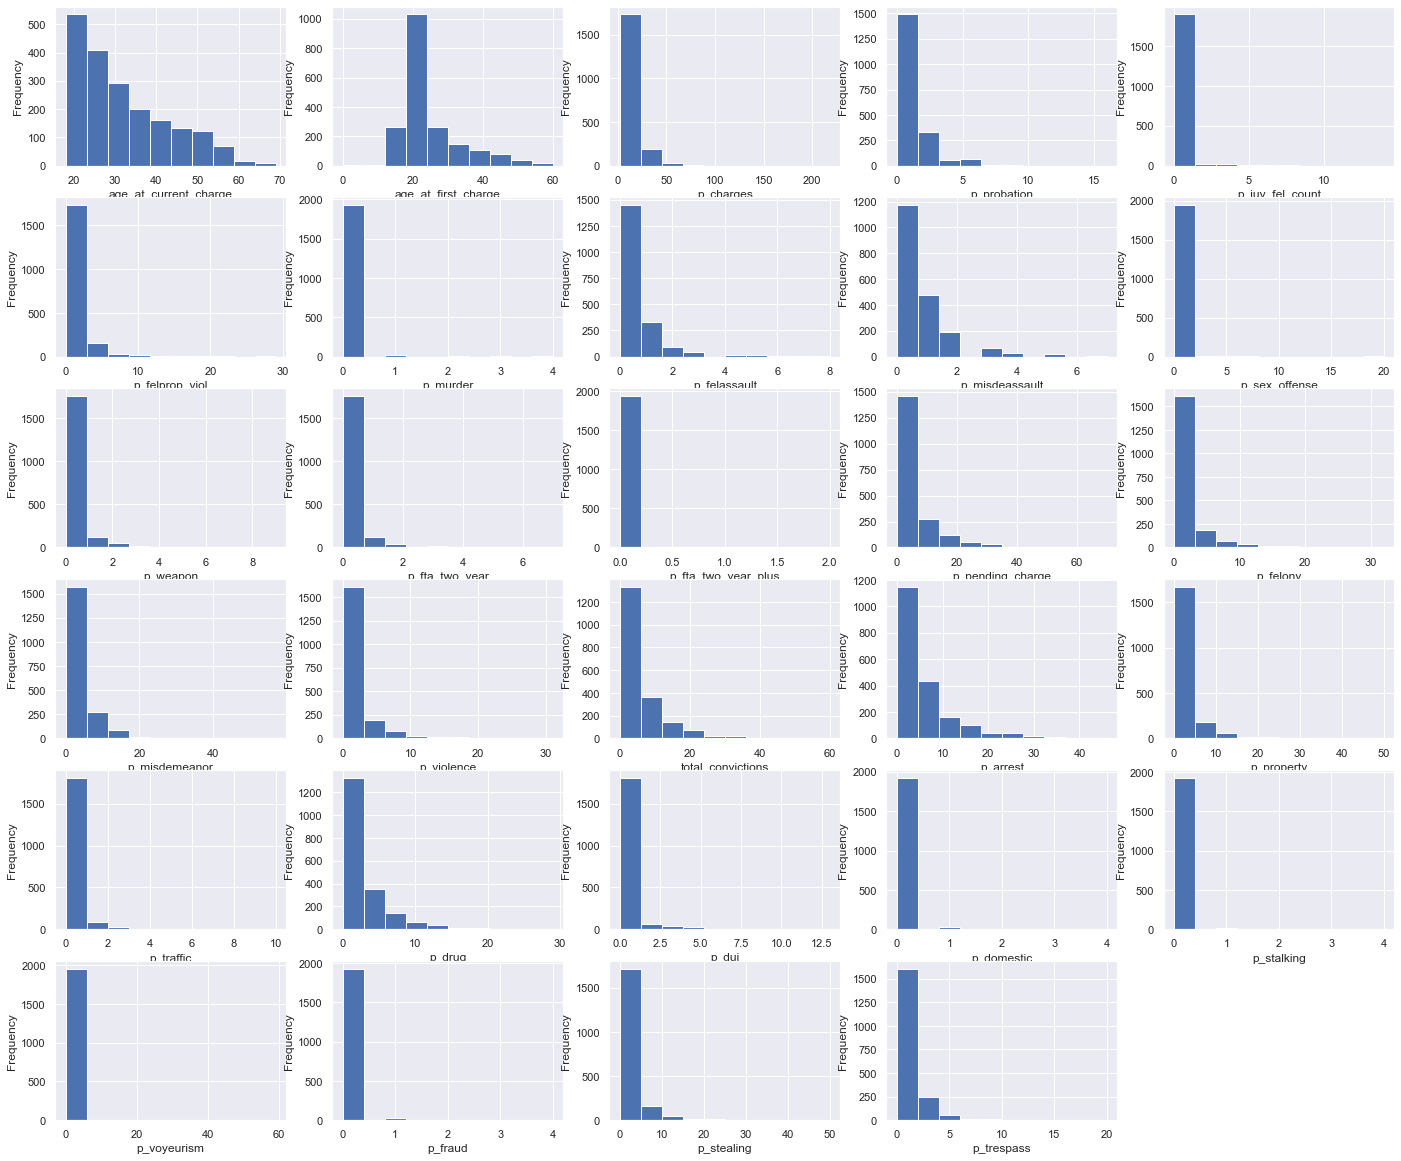

In [35]:
fig = plt.figure(figsize=(24, 24))
numerical_features = ['age_at_current_charge',
       'age_at_first_charge', 'p_charges',  'p_probation',
       'p_juv_fel_count', 'p_felprop_viol', 'p_murder', 'p_felassault',
       'p_misdeassault', 'p_sex_offense', 'p_weapon',
       'p_fta_two_year', 'p_fta_two_year_plus', 'p_pending_charge', 'p_felony', 'p_misdemeanor',
       'p_violence', 'total_convictions', 'p_arrest', 'p_property',
       'p_traffic', 'p_drug', 'p_dui', 'p_domestic', 'p_stalking',
       'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass']
print(len(numerical_features))
i = 0
for feature in numerical_features:
    sub = fig.add_subplot(7, 5, i+1)
    sub.set_xlabel(feature)
    whole_dataframe[feature].plot(kind = 'hist')
    i = i + 1

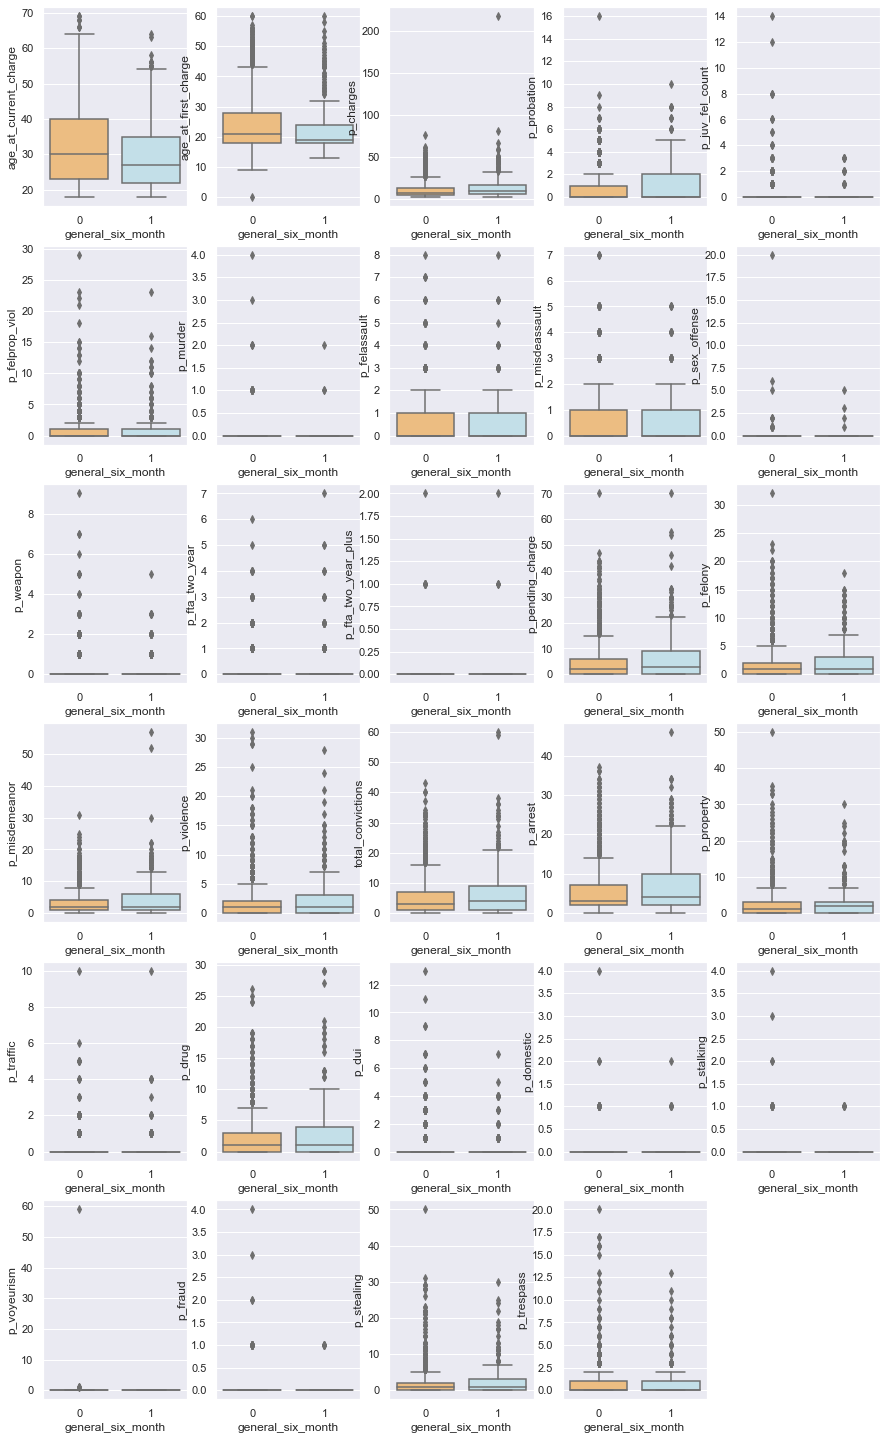

In [36]:
fig = plt.figure(figsize = (15, 30))
for i in range(len(numerical_features)):
    feature = numerical_features[i]
    sub = fig.add_subplot(7, 5, i + 1)
    sns.boxplot(x = "general_six_month", y = feature, data = whole_dataframe, palette = "RdYlBu")

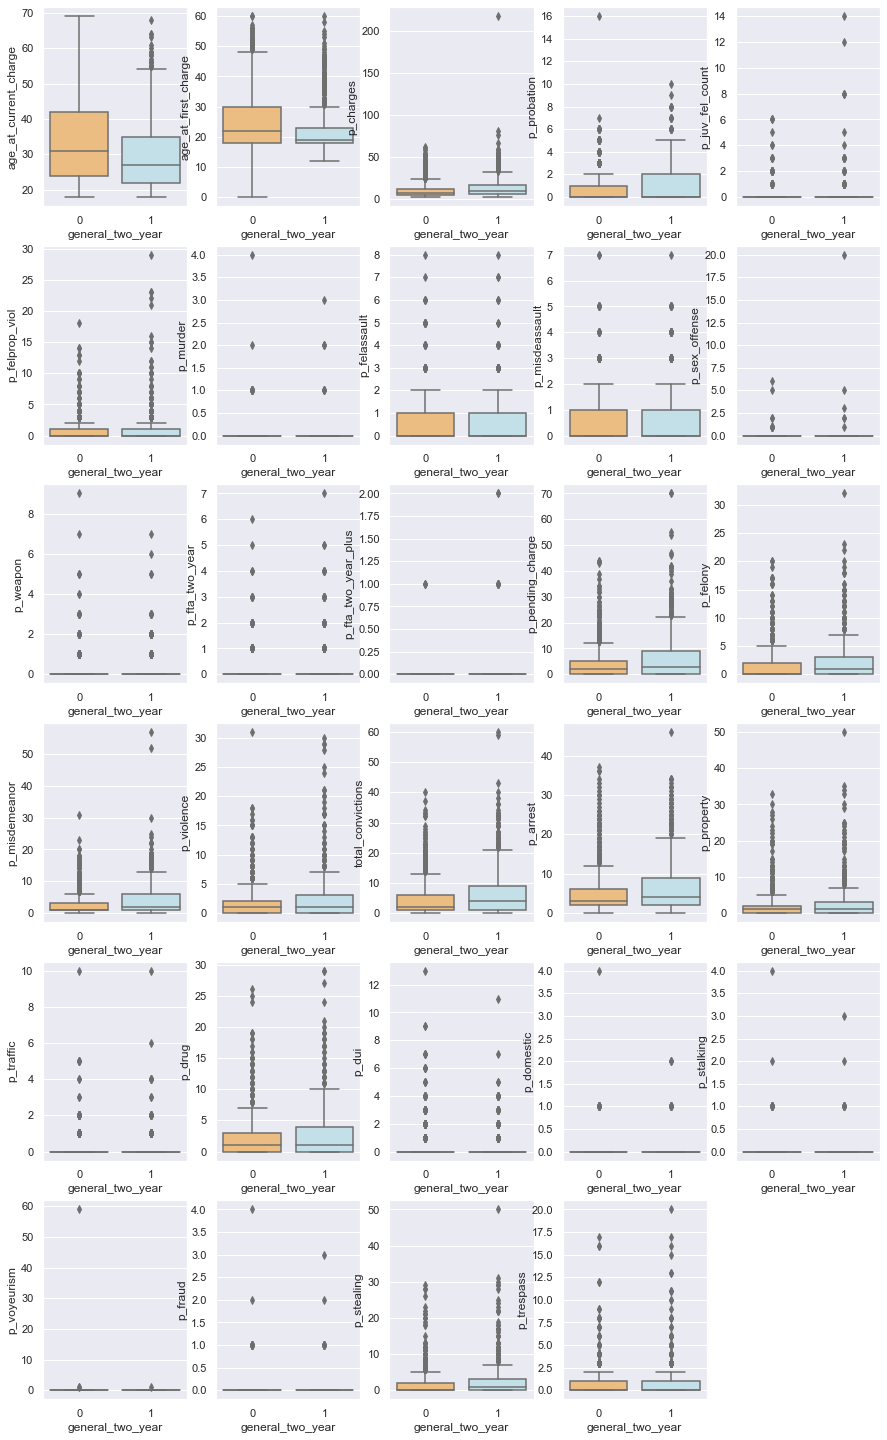

In [37]:
fig = plt.figure(figsize = (15, 30))
for i in range(len(numerical_features)):
    feature = numerical_features[i]
    sub = fig.add_subplot(7, 5, i + 1)
    sns.boxplot(x = "general_two_year", y = feature, data = whole_dataframe, palette = "RdYlBu")

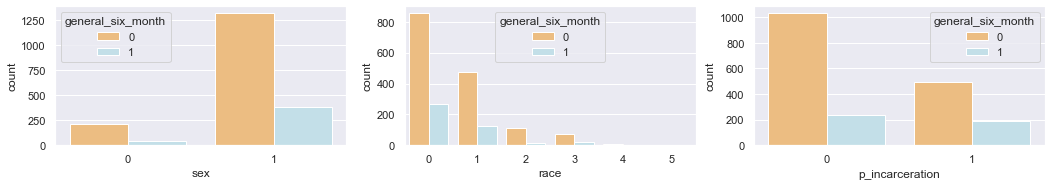

In [38]:
categorical_features = ['sex', 'race', 'p_incarceration']
fig = plt.figure(figsize = (24, 24))
i = 0
for feature in categorical_features:
       sub = fig.add_subplot(8, 4, i + 1)
       chart = sns.countplot(data = whole_dataframe, x = feature,  hue = "general_six_month", palette = "RdYlBu")
       i += 1

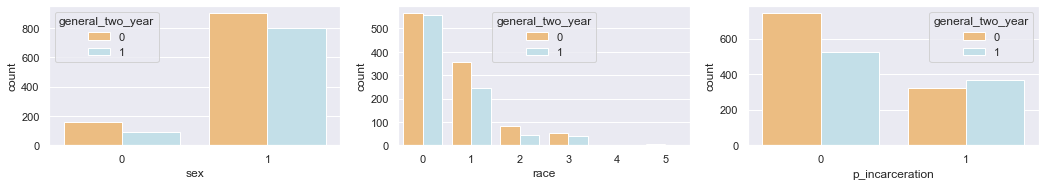

In [39]:

fig = plt.figure(figsize = (24, 24))
i = 0
for feature in categorical_features:
       sub = fig.add_subplot(8, 4, i + 1)
       chart = sns.countplot(data = whole_dataframe, x = feature,  hue = "general_two_year", palette = "RdYlBu")
       i += 1
       

<AxesSubplot:>

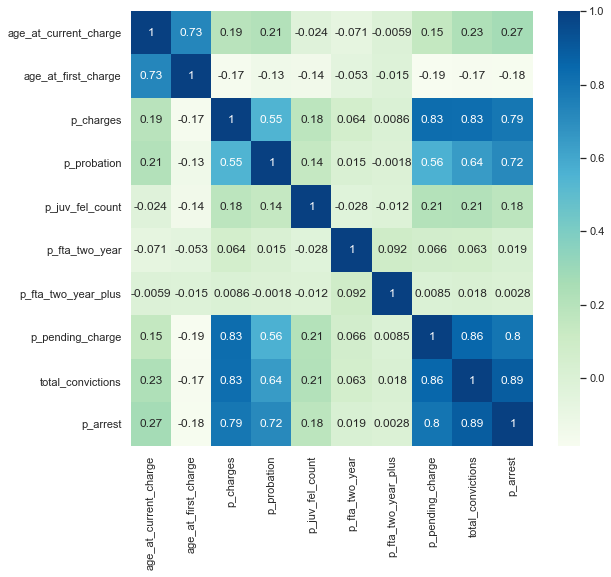

In [40]:
correlation = whole_dataframe[[ 'age_at_current_charge',
       'age_at_first_charge', 'p_charges',  'p_probation',
       'p_juv_fel_count', 'p_fta_two_year', 'p_fta_two_year_plus', 'p_pending_charge','total_convictions', 'p_arrest']].corr()
sns.set (rc = {'figure.figsize':(9, 8)})
sns.heatmap(correlation, cmap = "GnBu", annot = True)

<AxesSubplot:>

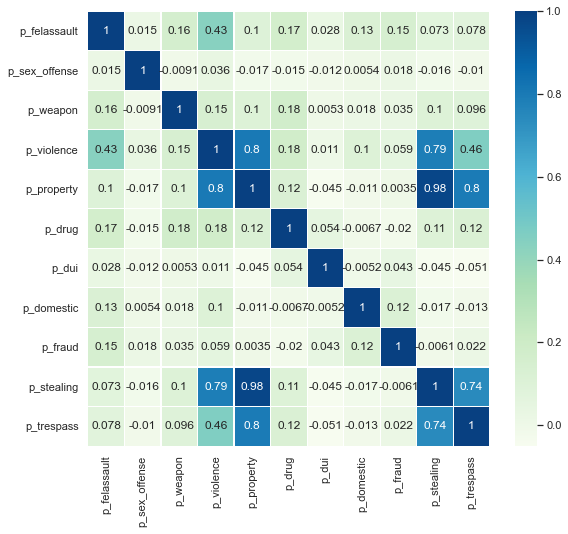

In [41]:
correlation = whole_dataframe[[ 'p_felassault', 'p_sex_offense', 'p_weapon', 'p_violence', 'p_property', 'p_drug', 'p_dui', 'p_domestic', 'p_fraud', 'p_stealing', 'p_trespass']].corr()
sns.set (rc = {'figure.figsize':(9, 8)})
sns.heatmap(correlation, linewidths=0.1, cmap = "GnBu", annot = True)

### Variable Selection


In [47]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [43]:
print(whole_dataframe_X.columns)

Index(['sex', 'race', 'age_at_current_charge', 'age_at_first_charge',
       'p_charges', 'p_incarceration', 'p_probation', 'p_juv_fel_count',
       'p_felprop_viol', 'p_murder', 'p_felassault', 'p_misdeassault',
       'p_famviol', 'p_sex_offense', 'p_weapon', 'p_fta_two_year',
       'p_fta_two_year_plus', 'current_violence', 'p_pending_charge',
       'p_felony', 'p_misdemeanor', 'p_violence', 'total_convictions',
       'p_arrest', 'p_property', 'p_traffic', 'p_drug', 'p_dui', 'p_domestic',
       'p_stalking', 'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass'],
      dtype='object')


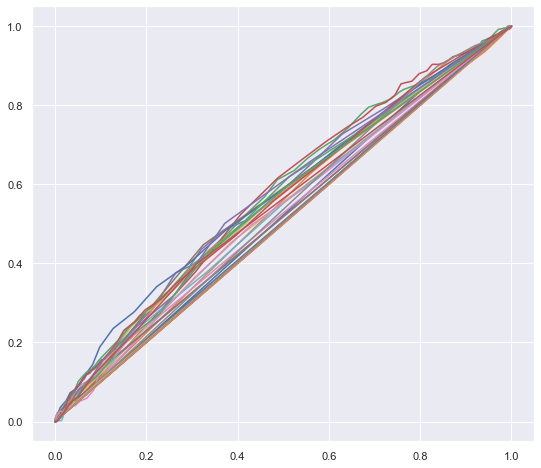

In [48]:
features_auc_dict = {}
ax = plt.gca()
for feature in whole_dataframe_X.columns:
    curr_clf = LogisticRegression(penalty = 'none')
    X = whole_dataframe_X[feature].values.reshape(-1, 1)
    y = whole_dataframe_label_choices["general_six_month"]
    curr_clf.fit(X, y)
    y_pred = curr_clf.predict_proba(X)[::,1]
    tpr, fpr, threshold = roc_curve(y, y_pred)
    features_auc_dict[feature] = metrics.roc_auc_score(y, y_pred)
    plt.plot(tpr, fpr)

In [49]:
# Index, Modified AUCs, and AUC Sign
features_list = []
for index in list(features_auc_dict.keys()):
    features_list.append((index, features_auc_dict[index]))

features_ranked = sorted(features_list, key=lambda x: x[1], reverse= True)
print(features_ranked)

[('p_misdemeanor', 0.5727426614857847), ('age_at_current_charge', 0.5726149347901358), ('age_at_first_charge', 0.5686792598007155), ('p_charges', 0.5677443927211172), ('total_convictions', 0.5649220944100335), ('p_property', 0.5647643596352865), ('p_incarceration', 0.5610048859308275), ('p_arrest', 0.5606378640403186), ('p_pending_charge', 0.5551656215134844), ('p_violence', 0.5531704689724157), ('p_stealing', 0.5506767206555612), ('p_trespass', 0.5447374293078906), ('race', 0.540176970722887), ('p_felprop_viol', 0.5347716692955795), ('p_felony', 0.5335174854768592), ('p_drug', 0.5329988843150079), ('p_dui', 0.5302727657446236), ('p_probation', 0.5214403877967145), ('sex', 0.5189335590351248), ('p_fta_two_year', 0.5175000961797408), ('p_weapon', 0.5162066710268148), ('p_felassault', 0.5053068133728311), ('p_traffic', 0.5040049244027239), ('p_murder', 0.5036609856499827), ('p_juv_fel_count', 0.503607124995191), ('current_violence', 0.5026384026468664), ('p_domestic', 0.5018889701073366)